In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import ta
from ta import add_all_ta_features
from ta.utils import dropna

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv(r'D:\Padantra\ulloo-client\data_results\RELIANCE_2003_22.csv')

In [4]:
data

,datetime,open,high,low,close,volume,oi
0,2003-01-01 00:00:00+05:30,57.90,58.04,57.19,57.33,17587195,0
1,2003-01-02 00:00:00+05:30,57.53,57.53,56.33,56.50,14893003,0
2,2003-01-03 00:00:00+05:30,56.81,56.85,55.27,55.43,26984675,0
3,2003-01-06 00:00:00+05:30,55.37,55.53,54.70,54.82,18020042,0
4,2003-01-07 00:00:00+05:30,55.06,55.36,54.73,54.87,14080161,0
...,...,...,...,...,...,...,...
4843,2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0
4844,2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0
4845,2022-06-28 00:00:00+05:30,2482.10,2533.95,2482.10,2527.70,6263867,0
4846,2022-06-29 00:00:00+05:30,2507.20,2597.00,2501.00,2580.15,8863172,0


In [5]:
data['rsi'] = ta.momentum.rsi(data['close'], 14, False)
data['ema_50'] = ta.trend.ema_indicator(data['close'], 50, False)
data['ema_100'] = ta.trend.ema_indicator(data.close , 100, False)
data['ema_200'] = ta.trend.ema_indicator(data.close , 200, False)
data['sma_50'] = ta.trend.sma_indicator(data.close, 50, False)
data['sma_100'] = ta.trend.sma_indicator(data.close , 100, False)
data['sma_200'] = ta.trend.sma_indicator(data.close , 200, False)
data['ATR_14'] = ta.volatility.average_true_range(data.high,data.low,data.close,14,False)
data['bollinger_hband_14'] = ta.volatility.bollinger_hband(data.close, window= 14, window_dev= 1.96, fillna = False)
data['bollinger_lband_14'] = ta.volatility.bollinger_lband(data.close, window= 14, window_dev= 1.96, fillna = False)
data['Chaikin_MFI_14'] = ta.volume.chaikin_money_flow(data.high, data.low, data.close, data.volume,window = 14, fillna =False)

# data.dropna(axis = 0,inplace =True)

In [6]:
data

,datetime,open,high,low,close,volume,oi,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14
0,2003-01-01 00:00:00+05:30,57.90,58.04,57.19,57.33,17587195,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,2003-01-02 00:00:00+05:30,57.53,57.53,56.33,56.50,14893003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,2003-01-03 00:00:00+05:30,56.81,56.85,55.27,55.43,26984675,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,2003-01-06 00:00:00+05:30,55.37,55.53,54.70,54.82,18020042,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,2003-01-07 00:00:00+05:30,55.06,55.36,54.73,54.87,14080161,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,2470.638242,2626.035,2536.2745,2507.22600,74.878289,2813.908156,2421.070415,-0.156093
4844,2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,2470.857264,2624.855,2537.3350,2507.56125,74.058411,2783.773476,2411.190809,-0.203726
4845,2022-06-28 00:00:00+05:30,2482.10,2533.95,2482.10,2527.70,6263867,0,44.154375,2591.413381,2556.044385,2471.422863,2624.532,2538.8250,2507.99525,72.472096,2759.210635,2407.703650,-0.111757
4846,2022-06-29 00:00:00+05:30,2507.20,2597.00,2501.00,2580.15,8863172,0,49.167078,2590.971680,2556.521724,2472.504725,2623.319,2540.7910,2508.73925,74.152661,2699.132492,2436.553223,-0.125515


In [7]:
data.set_index('datetime', inplace= True)

In [8]:
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])
# fig.add_trace(go.candlestick(x=data.index, open =data['open'],high = data['high'], low = data['low'],close = data['close']))

fig.update_layout(title = 'Cipla', yaxis_title = 'Price (INR)')

# fig.update_xaxes(rangeslider_visible = True, rangeselector = dict(button = list([dict(count)])))

fig.show()

In [9]:
from turtle import width
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols = 1, row_heights = [0.7,0.3])
fig.add_trace(go.Candlestick( x = data.index, open = data.open,high = data.high , low = data.low, close =data.close, name ="Market Data"),row = 1, col =1)
fig.update_xaxes(rangeslider_visible = False)

fig.add_trace(go.Scatter(x=data.index, y= data.rsi, name= 'RSI', line= dict(color ='royalblue', width = 1.2)), row = 2, col= 1)

fig.show()


In [10]:
data.dropna(axis = 0, inplace= True)
data

,open,high,low,close,volume,oi,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14
datetime,,,,,,,,,,,,,,,,,
2003-10-16 00:00:00+05:30,95.85,95.85,92.52,94.05,85643153,0,71.394818,80.269715,73.495841,67.022998,79.3724,71.0580,62.74940,3.525463,94.748433,81.135852,0.152038
2003-10-17 00:00:00+05:30,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,67.293814,79.9076,71.4460,62.93395,3.429358,95.505967,82.118319,0.069580
2003-10-20 00:00:00+05:30,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,67.547109,80.3938,71.8083,63.11520,3.390833,95.787652,83.143777,0.077959
2003-10-21 00:00:00+05:30,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,67.771815,80.7976,72.1348,63.28870,3.430059,95.733196,83.869661,-0.028551
2003-10-22 00:00:00+05:30,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,67.995578,81.2118,72.4704,63.46590,3.379340,95.236749,85.278966,0.013075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,2470.638242,2626.0350,2536.2745,2507.22600,74.878289,2813.908156,2421.070415,-0.156093
2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,2470.857264,2624.8550,2537.3350,2507.56125,74.058411,2783.773476,2411.190809,-0.203726
2022-06-28 00:00:00+05:30,2482.10,2533.95,2482.10,2527.70,6263867,0,44.154375,2591.413381,2556.044385,2471.422863,2624.5320,2538.8250,2507.99525,72.472096,2759.210635,2407.703650,-0.111757


In [11]:
data

,open,high,low,close,volume,oi,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14
datetime,,,,,,,,,,,,,,,,,
2003-10-16 00:00:00+05:30,95.85,95.85,92.52,94.05,85643153,0,71.394818,80.269715,73.495841,67.022998,79.3724,71.0580,62.74940,3.525463,94.748433,81.135852,0.152038
2003-10-17 00:00:00+05:30,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,67.293814,79.9076,71.4460,62.93395,3.429358,95.505967,82.118319,0.069580
2003-10-20 00:00:00+05:30,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,67.547109,80.3938,71.8083,63.11520,3.390833,95.787652,83.143777,0.077959
2003-10-21 00:00:00+05:30,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,67.771815,80.7976,72.1348,63.28870,3.430059,95.733196,83.869661,-0.028551
2003-10-22 00:00:00+05:30,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,67.995578,81.2118,72.4704,63.46590,3.379340,95.236749,85.278966,0.013075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,2470.638242,2626.0350,2536.2745,2507.22600,74.878289,2813.908156,2421.070415,-0.156093
2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,2470.857264,2624.8550,2537.3350,2507.56125,74.058411,2783.773476,2411.190809,-0.203726
2022-06-28 00:00:00+05:30,2482.10,2533.95,2482.10,2527.70,6263867,0,44.154375,2591.413381,2556.044385,2471.422863,2624.5320,2538.8250,2507.99525,72.472096,2759.210635,2407.703650,-0.111757


In [12]:
data['Prev_High'] = data['high'].shift(1)
data['Prev_Low'] = data['low'].shift(1)
data['Prev_Close'] = data['close'].shift(1)
data['OO'] = data['open']-data['open'].shift(1)
data['OC'] = data['open'] - data['Prev_Close']

In [13]:
data['Ret'] = (data['open'].shift(-1) - data['open'])/data['open']
# for i in range(1,len(data)):
#     data['Ret%i' %i] = data['Ret'].shift(i)

In [14]:
data.dropna(inplace= True)

Splitting the Datapoints

In [15]:
t = .8
split = int(t*len(data))
split

3717

Signal

In [16]:
data['Signal'] = 0

data.loc[data['Ret'] > data['Ret'][:split].quantile(q = 0.66),'Signal'] =1

data.loc[data['Ret'] < data['Ret'][:split].quantile(q = 0.34),'Signal'] =-1

In [17]:
data

,open,high,low,close,volume,oi,rsi,ema_50,ema_100,ema_200,...,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14,Prev_High,Prev_Low,Prev_Close,OO,OC,Ret,Signal
datetime,,,,,,,,,,,,,,,,,,,,,
2003-10-17 00:00:00+05:30,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,67.293814,...,95.505967,82.118319,0.069580,95.85,92.52,94.05,-2.10,-0.30,0.012267,1
2003-10-20 00:00:00+05:30,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,67.547109,...,95.787652,83.143777,0.077959,95.67,93.49,94.24,1.15,0.66,-0.016228,-1
2003-10-21 00:00:00+05:30,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,67.771815,...,95.733196,83.869661,-0.028551,95.29,92.40,92.75,-1.54,0.61,-0.050985,-1
2003-10-22 00:00:00+05:30,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,67.995578,...,95.236749,85.278966,0.013075,93.36,89.42,90.13,-4.76,-1.53,0.020767,1
2003-10-23 00:00:00+05:30,90.44,90.48,87.80,88.32,30542961,0,53.879643,82.219682,75.169511,68.197811,...,95.041123,85.756019,-0.080632,91.32,88.60,90.26,1.84,0.18,-0.212406,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00+05:30,2515.05,2525.00,2445.00,2464.95,8974475,0,37.474296,2602.155362,2559.078135,2470.342646,...,2835.524426,2437.668431,-0.217705,2558.30,2501.00,2505.60,-43.05,9.45,-0.013936,-1
2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,2470.638242,...,2813.908156,2421.070415,-0.156093,2525.00,2445.00,2464.95,-35.05,15.05,0.026190,1
2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,2470.857264,...,2783.773476,2411.190809,-0.203726,2511.00,2468.00,2500.05,64.95,44.90,-0.024696,-1


In [18]:
X = data.drop(['close','Signal','high','low','volume', 'Ret'], axis = 1)
y = data['Signal']

In [19]:
X.columns

Index(['open', 'oi', 'rsi', 'ema_50', 'ema_100', 'ema_200', 'sma_50',
       'sma_100', 'sma_200', 'ATR_14', 'bollinger_hband_14',
       'bollinger_lband_14', 'Chaikin_MFI_14', 'Prev_High', 'Prev_Low',
       'Prev_Close', 'OO', 'OC'],
      dtype='object')

In [20]:



c = [10,100,1000, 10000]
g = [1e-2,1e-1,1e0]

parameters = {
    'svc__C':c,
    'svc__gamma' : g,
    'svc__kernel' : ['rbf']
}


steps = [('Scalar', StandardScaler()),('svc',SVC())]
pipeline = Pipeline(steps)
rcv = RandomizedSearchCV(pipeline, parameters,cv= TimeSeriesSplit(n_splits =2))

In [21]:
X

,open,oi,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14,Prev_High,Prev_Low,Prev_Close,OO,OC
datetime,,,,,,,,,,,,,,,,,,
2003-10-17 00:00:00+05:30,93.75,0,71.646760,80.817569,73.906616,67.293814,79.9076,71.4460,62.93395,3.429358,95.505967,82.118319,0.069580,95.85,92.52,94.05,-2.10,-0.30
2003-10-20 00:00:00+05:30,94.90,0,66.686430,81.285508,74.279753,67.547109,80.3938,71.8083,63.11520,3.390833,95.787652,83.143777,0.077959,95.67,93.49,94.24,1.15,0.66
2003-10-21 00:00:00+05:30,93.36,0,58.956973,81.632350,74.593619,67.771815,80.7976,72.1348,63.28870,3.430059,95.733196,83.869661,-0.028551,95.29,92.40,92.75,-1.54,0.61
2003-10-22 00:00:00+05:30,88.60,0,59.209609,81.970690,74.903844,67.995578,81.2118,72.4704,63.46590,3.379340,95.236749,85.278966,0.013075,93.36,89.42,90.13,-4.76,-1.53
2003-10-23 00:00:00+05:30,90.44,0,53.879643,82.219682,75.169511,68.197811,81.6046,72.7912,63.63315,3.329387,95.041123,85.756019,-0.080632,91.32,88.60,90.26,1.84,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00+05:30,2515.05,0,37.474296,2602.155362,2559.078135,2470.342646,2627.2550,2534.6325,2506.66825,77.095850,2835.524426,2437.668431,-0.217705,2558.30,2501.00,2505.60,-43.05,9.45
2022-06-24 00:00:00+05:30,2480.00,0,41.038814,2598.151230,2557.909261,2470.638242,2626.0350,2536.2745,2507.22600,74.878289,2813.908156,2421.070415,-0.156093,2525.00,2445.00,2464.95,-35.05,15.05
2022-06-27 00:00:00+05:30,2544.95,0,40.514416,2594.013927,2556.616999,2470.857264,2624.8550,2537.3350,2507.56125,74.058411,2783.773476,2411.190809,-0.203726,2511.00,2468.00,2500.05,64.95,44.90


In [22]:
rcv.fit(X.iloc[:split], y.iloc[:split])

best_C =rcv.best_params_['svc__C']
best_gamma = rcv.best_params_['svc__gamma']
best_kernel = rcv.best_params_['svc__kernel']

In [23]:
cls = SVC(C=best_C, kernel =best_kernel, gamma = best_gamma)

In [24]:
ss = StandardScaler()
cls.fit(ss.fit_transform(X.iloc[:split]), y.iloc[:split])

SVC(C=100, gamma=0.01)

In [25]:
y_pred = cls.predict(ss.transform(X.iloc[split:]))

data['Pred_Signal'] = 0

In [69]:
y_pred

a = np.where(y_pred == -1,0,y_pred)

In [27]:
data.iloc[:split, data.columns.get_loc('Pred_Signal')] = pd.Series(
    cls.predict(ss.transform(X.iloc[:split])).tolist())
data.iloc[split:, data.columns.get_loc('Pred_Signal')] = y_pred

In [71]:
data['Pred_Signal_buy_only'] =0

In [72]:
data.iloc[:split, data.columns.get_loc('Pred_Signal_buy_only')] = pd.Series(
    cls.predict(ss.transform(X.iloc[:split])).tolist())
data.iloc[split:, data.columns.get_loc('Pred_Signal_buy_only')] = a

In [28]:
data

,open,high,low,close,volume,oi,rsi,ema_50,ema_100,ema_200,...,bollinger_lband_14,Chaikin_MFI_14,Prev_High,Prev_Low,Prev_Close,OO,OC,Ret,Signal,Pred_Signal
datetime,,,,,,,,,,,,,,,,,,,,,
2003-10-17 00:00:00+05:30,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,67.293814,...,82.118319,0.069580,95.85,92.52,94.05,-2.10,-0.30,0.012267,1,1
2003-10-20 00:00:00+05:30,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,67.547109,...,83.143777,0.077959,95.67,93.49,94.24,1.15,0.66,-0.016228,-1,1
2003-10-21 00:00:00+05:30,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,67.771815,...,83.869661,-0.028551,95.29,92.40,92.75,-1.54,0.61,-0.050985,-1,-1
2003-10-22 00:00:00+05:30,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,67.995578,...,85.278966,0.013075,93.36,89.42,90.13,-4.76,-1.53,0.020767,1,1
2003-10-23 00:00:00+05:30,90.44,90.48,87.80,88.32,30542961,0,53.879643,82.219682,75.169511,68.197811,...,85.756019,-0.080632,91.32,88.60,90.26,1.84,0.18,-0.212406,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00+05:30,2515.05,2525.00,2445.00,2464.95,8974475,0,37.474296,2602.155362,2559.078135,2470.342646,...,2437.668431,-0.217705,2558.30,2501.00,2505.60,-43.05,9.45,-0.013936,-1,-1
2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,2470.638242,...,2421.070415,-0.156093,2525.00,2445.00,2464.95,-35.05,15.05,0.026190,1,-1
2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,2470.857264,...,2411.190809,-0.203726,2511.00,2468.00,2500.05,64.95,44.90,-0.024696,-1,-1


In [73]:
data['Ret1'] = data['Ret'] *data['Pred_Signal']
data['Ret2'] = data['Ret'] *data['Pred_Signal_buy_only']


In [75]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index[split:], y = (data['Ret'][split:]+1).cumprod(),line=dict(color = 'royalblue', width = .8), name= 'Stock Returns'))
fig.add_trace(go.Scatter(x = data.index[split:], y = (data['Ret1'][split:]+1).cumprod(), line=dict(color = 'orange', width = .8), name= 'strategy returns'))
fig.add_trace(go.Scatter(x = data.index[split:], y = (data['Ret2'][split:]+1).cumprod(), line=dict(color = 'red', width = .8), name= 'strategy returns'))

fig.show()

In [31]:
data.reset_index(inplace= True)
data

,datetime,open,high,low,close,volume,oi,rsi,ema_50,ema_100,...,Chaikin_MFI_14,Prev_High,Prev_Low,Prev_Close,OO,OC,Ret,Signal,Pred_Signal,Ret1
0,2003-10-17 00:00:00+05:30,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,...,0.069580,95.85,92.52,94.05,-2.10,-0.30,0.012267,1,1,0.012267
1,2003-10-20 00:00:00+05:30,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,...,0.077959,95.67,93.49,94.24,1.15,0.66,-0.016228,-1,1,-0.016228
2,2003-10-21 00:00:00+05:30,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,...,-0.028551,95.29,92.40,92.75,-1.54,0.61,-0.050985,-1,-1,0.050985
3,2003-10-22 00:00:00+05:30,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,...,0.013075,93.36,89.42,90.13,-4.76,-1.53,0.020767,1,1,0.020767
4,2003-10-23 00:00:00+05:30,90.44,90.48,87.80,88.32,30542961,0,53.879643,82.219682,75.169511,...,-0.080632,91.32,88.60,90.26,1.84,0.18,-0.212406,-1,-1,0.212406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,2022-06-23 00:00:00+05:30,2515.05,2525.00,2445.00,2464.95,8974475,0,37.474296,2602.155362,2559.078135,...,-0.217705,2558.30,2501.00,2505.60,-43.05,9.45,-0.013936,-1,-1,0.013936
4643,2022-06-24 00:00:00+05:30,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,...,-0.156093,2525.00,2445.00,2464.95,-35.05,15.05,0.026190,1,-1,-0.026190
4644,2022-06-27 00:00:00+05:30,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,...,-0.203726,2511.00,2468.00,2500.05,64.95,44.90,-0.024696,-1,-1,0.024696
4645,2022-06-28 00:00:00+05:30,2482.10,2533.95,2482.10,2527.70,6263867,0,44.154375,2591.413381,2556.044385,...,-0.111757,2544.95,2481.55,2492.65,-62.85,-10.55,0.010112,1,-1,-0.010112


In [32]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'] = [d.strftime('%Y-%m-%d') for d in data['datetime']]
data = data.set_index('datetime')

In [39]:
data = data.reset_index()

In [44]:
data

,datetime,open,high,low,close,volume,oi,rsi,ema_50,ema_100,...,Chaikin_MFI_14,Prev_High,Prev_Low,Prev_Close,OO,OC,Ret,Signal,Pred_Signal,Ret1
0,2003-10-17,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,...,0.069580,95.85,92.52,94.05,-2.10,-0.30,0.012267,1,1,0.012267
1,2003-10-20,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,...,0.077959,95.67,93.49,94.24,1.15,0.66,-0.016228,-1,1,-0.016228
2,2003-10-21,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,...,-0.028551,95.29,92.40,92.75,-1.54,0.61,-0.050985,-1,-1,0.050985
3,2003-10-22,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,...,0.013075,93.36,89.42,90.13,-4.76,-1.53,0.020767,1,1,0.020767
4,2003-10-23,90.44,90.48,87.80,88.32,30542961,0,53.879643,82.219682,75.169511,...,-0.080632,91.32,88.60,90.26,1.84,0.18,-0.212406,-1,-1,0.212406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4642,2022-06-23,2515.05,2525.00,2445.00,2464.95,8974475,0,37.474296,2602.155362,2559.078135,...,-0.217705,2558.30,2501.00,2505.60,-43.05,9.45,-0.013936,-1,-1,0.013936
4643,2022-06-24,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,...,-0.156093,2525.00,2445.00,2464.95,-35.05,15.05,0.026190,1,-1,-0.026190
4644,2022-06-27,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,...,-0.203726,2511.00,2468.00,2500.05,64.95,44.90,-0.024696,-1,-1,0.024696
4645,2022-06-28,2482.10,2533.95,2482.10,2527.70,6263867,0,44.154375,2591.413381,2556.044385,...,-0.111757,2544.95,2481.55,2492.65,-62.85,-10.55,0.010112,1,-1,-0.010112


In [48]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')

In [49]:
data

,open,high,low,close,volume,oi,rsi,ema_50,ema_100,ema_200,...,Chaikin_MFI_14,Prev_High,Prev_Low,Prev_Close,OO,OC,Ret,Signal,Pred_Signal,Ret1
datetime,,,,,,,,,,,,,,,,,,,,,
2003-10-17,93.75,95.67,93.49,94.24,34932670,0,71.646760,80.817569,73.906616,67.293814,...,0.069580,95.85,92.52,94.05,-2.10,-0.30,0.012267,1,1,0.012267
2003-10-20,94.90,95.29,92.40,92.75,23271527,0,66.686430,81.285508,74.279753,67.547109,...,0.077959,95.67,93.49,94.24,1.15,0.66,-0.016228,-1,1,-0.016228
2003-10-21,93.36,93.36,89.42,90.13,35807579,0,58.956973,81.632350,74.593619,67.771815,...,-0.028551,95.29,92.40,92.75,-1.54,0.61,-0.050985,-1,-1,0.050985
2003-10-22,88.60,91.32,88.60,90.26,28668332,0,59.209609,81.970690,74.903844,67.995578,...,0.013075,93.36,89.42,90.13,-4.76,-1.53,0.020767,1,1,0.020767
2003-10-23,90.44,90.48,87.80,88.32,30542961,0,53.879643,82.219682,75.169511,68.197811,...,-0.080632,91.32,88.60,90.26,1.84,0.18,-0.212406,-1,-1,0.212406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,2515.05,2525.00,2445.00,2464.95,8974475,0,37.474296,2602.155362,2559.078135,2470.342646,...,-0.217705,2558.30,2501.00,2505.60,-43.05,9.45,-0.013936,-1,-1,0.013936
2022-06-24,2480.00,2511.00,2468.00,2500.05,6571866,0,41.038814,2598.151230,2557.909261,2470.638242,...,-0.156093,2525.00,2445.00,2464.95,-35.05,15.05,0.026190,1,-1,-0.026190
2022-06-27,2544.95,2544.95,2481.55,2492.65,7141493,0,40.514416,2594.013927,2556.616999,2470.857264,...,-0.203726,2511.00,2468.00,2500.05,64.95,44.90,-0.024696,-1,-1,0.024696


In [61]:
data['Ret1'].iloc[split:3900]

datetime
2018-09-27    0.003904
2018-09-28   -0.001746
2018-10-01   -0.000000
2018-10-03   -0.000000
2018-10-04    0.075662
                ...   
2019-06-20    0.000000
2019-06-21   -0.000000
2019-06-24   -0.000000
2019-06-25    0.025498
2019-06-26    0.000000
Name: Ret1, Length: 183, dtype: float64

d:\Padantra\ulloo-client\tenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Start date,2018-09-27
End date,2019-11-25
Total months,13
,Backtest
Annual return,146.3%
Cumulative returns,175.1%
Annual volatility,27.9%
Sharpe ratio,3.38
Calmar ratio,8.35
Stability,0.95
Max drawdown,-17.5%


d:\Padantra\ulloo-client\tenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



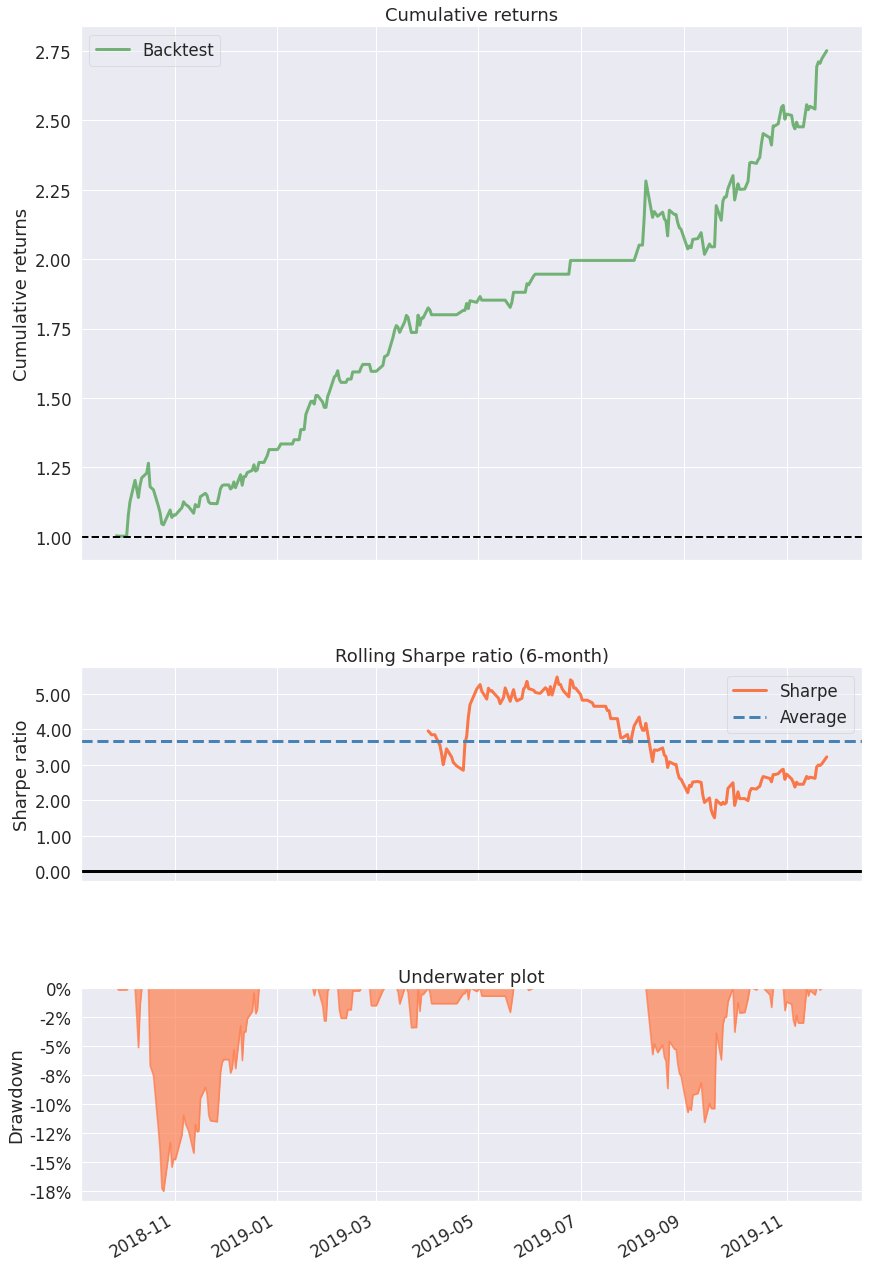

In [63]:
import pyfolio as pf
pf.create_simple_tear_sheet(data['Ret1'].iloc[split:4000])
# (data[split:]['Ret1'] +1).cumprod()

d:\Padantra\ulloo-client\tenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Start date,2018-09-27
End date,2019-11-25
Total months,13
,Backtest
Annual return,120.9%
Cumulative returns,143.5%
Annual volatility,25.2%
Sharpe ratio,3.27
Calmar ratio,8.07
Stability,0.97
Max drawdown,-15.0%


d:\Padantra\ulloo-client\tenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



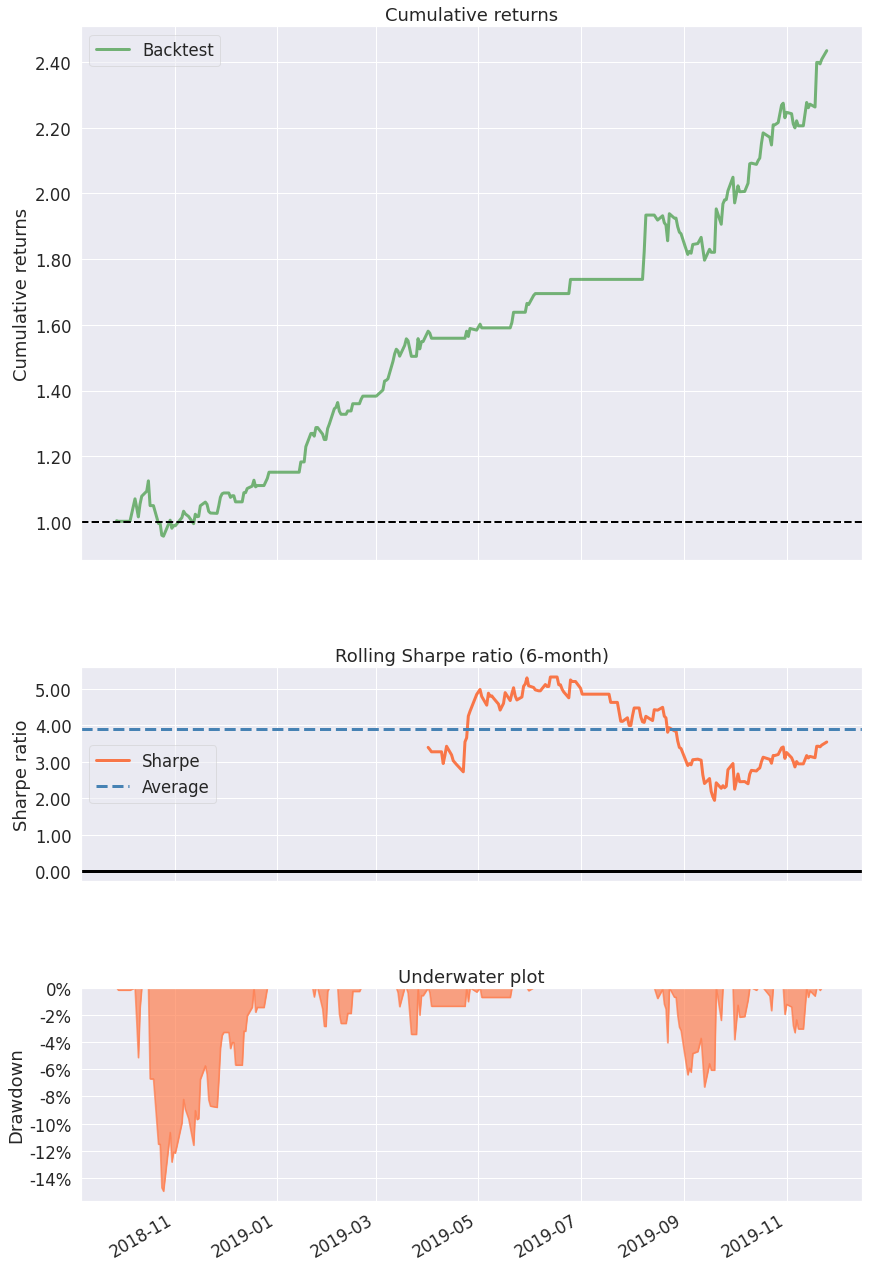

In [76]:
pf.create_simple_tear_sheet(data['Ret2'].iloc[split:4000])
